# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy() 
data['Survived'] = y_train

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

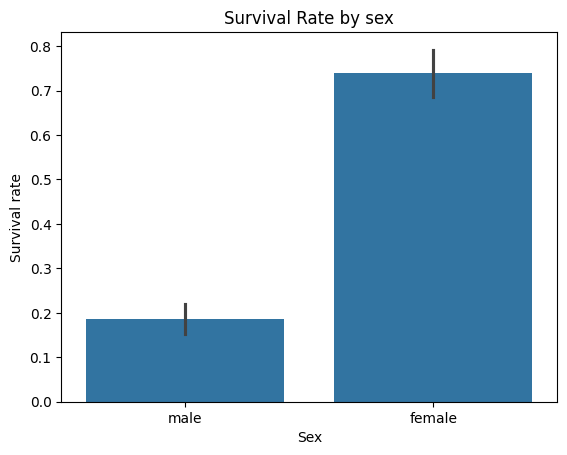

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.xlabel("Sex")
plt.ylabel("Survival rate")
plt.title("Survival Rate by sex")
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, first-class passengers survived more

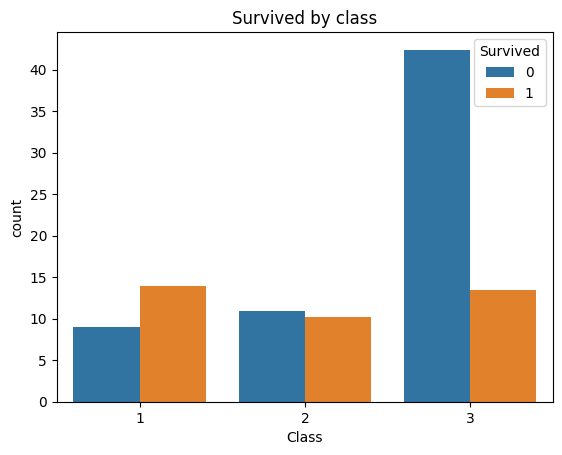

In [5]:
# Show the relevant statistics or visualization(s) to support your answer
sns.countplot(x="Pclass", hue="Survived", data=data,stat="percent") 
plt.xlabel("Class")
plt.ylabel("count")
plt.title("Survived by class")
plt.show()

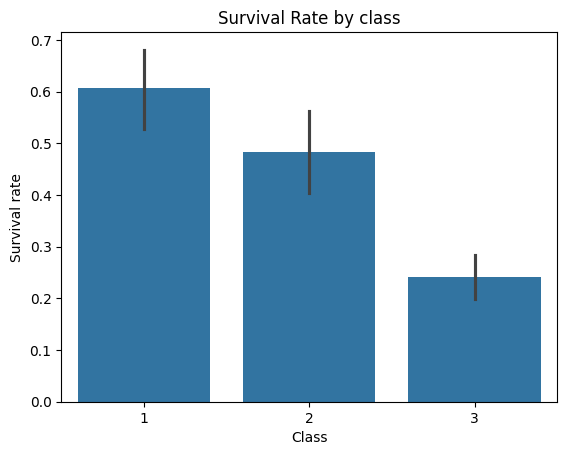

In [6]:
#Plot
sns.barplot(x='Pclass', y='Survived', data=data)
plt.xlabel("Class")
plt.ylabel("Survival rate")
plt.title("Survival Rate by class")
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes, it seems that who embarked in Cherbourg had a higher chance of surviving

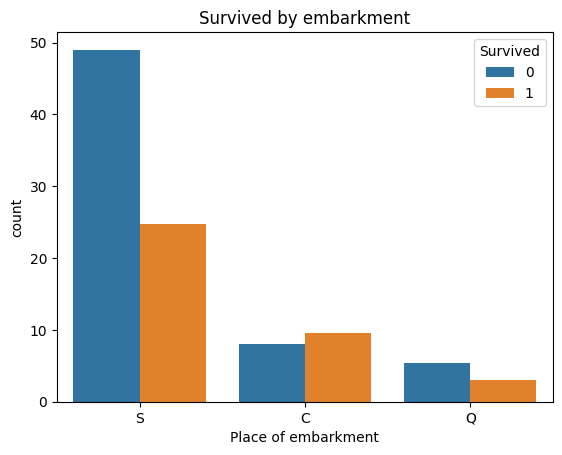

In [7]:
# Show the relevant statistics or visualization(s) to support your answer
sns.countplot(data=data, hue="Survived", x="Embarked",stat="percent")
plt.xlabel("Place of embarkment")
plt.ylabel("count")
plt.title("Survived by embarkment")
plt.show()

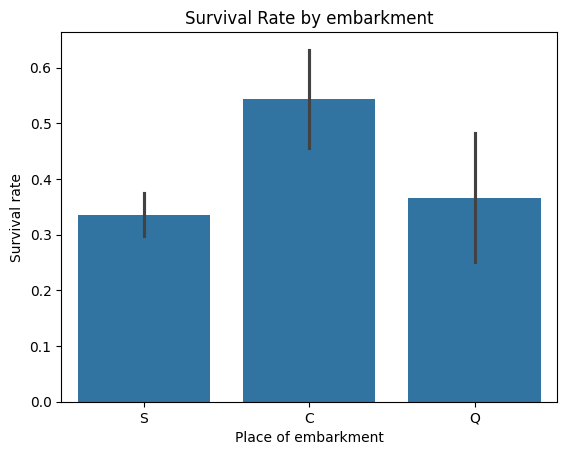

In [8]:
#Plot
sns.barplot(x='Embarked', y='Survived', data=data)
plt.xlabel("Place of embarkment")
plt.ylabel("Survival rate")
plt.title("Survival Rate by embarkment")
plt.show()

# Question 3: How is age related to survival?

Answer: Younger people had a higher chance to survive, Older are a really tiny number so it's not significative to make a prediction on their survival rate with respect to others

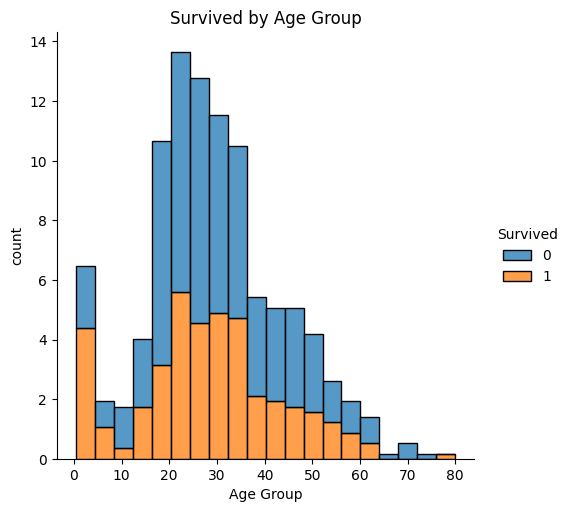

In [9]:
# Show the relevant statistics or visualization(s) to support your answer
sns.displot(data=data,x="Age",hue="Survived", multiple="stack", stat="percent")
plt.ylabel("count")
plt.xlabel("Age Group")
plt.title("Survived by Age Group")
plt.show()

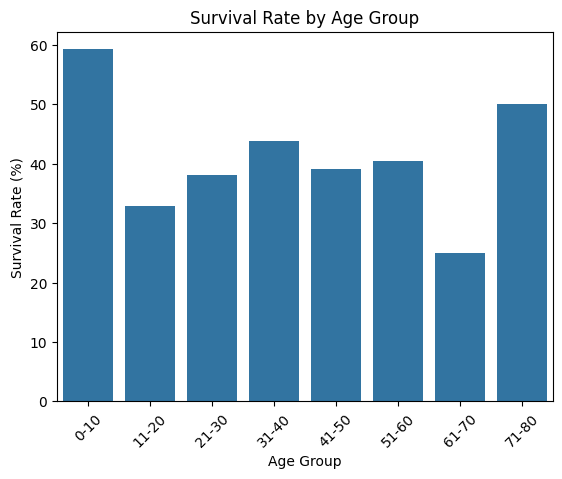

In [10]:
# 1. Define age bins
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

# 2. Compute survival rate per age group
survival_rate = data.groupby("AgeGroup")["Survived"].mean().reset_index()
survival_rate["Survived"] *= 100  # convert to percentage

# 3. Plot
sns.barplot(data=survival_rate, x="AgeGroup", y="Survived")
plt.xticks(rotation=45)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Age Group")
plt.title("Survival Rate by Age Group")
plt.show()

# Question 4: Does family size somehow affect the survival rate?

Answer: Families with 1 and 2 children had a higher chance of surviving wrt someon without childrens. We have too less datas regarding families with more than 2 childrens

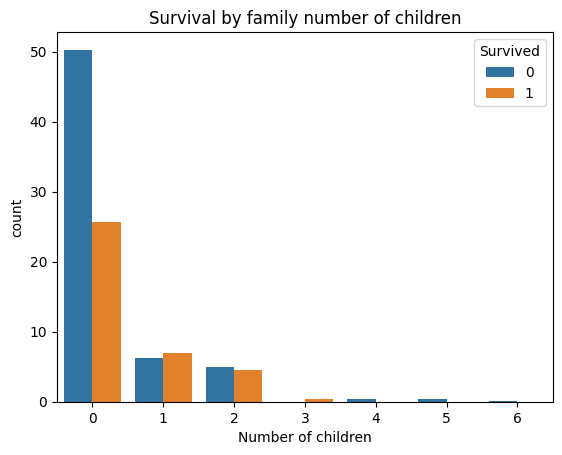

In [11]:
# Show the relevant statistics or visualization(s) to support your answer
sns.countplot(x="Parch", hue="Survived", data=data,stat="percent") 
plt.xlabel("Number of children")
plt.ylabel("count")
plt.title("Survival by family number of children")
plt.show()


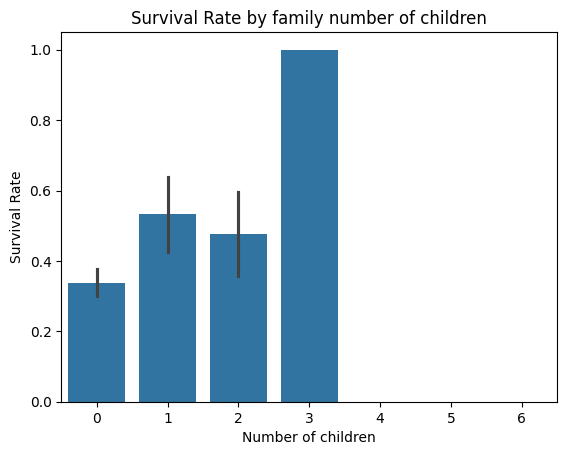

In [12]:
# Plot
sns.barplot(x="Parch", y="Survived", data=data)
plt.xlabel("Number of children")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by family number of children")
plt.show()

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes, it's true

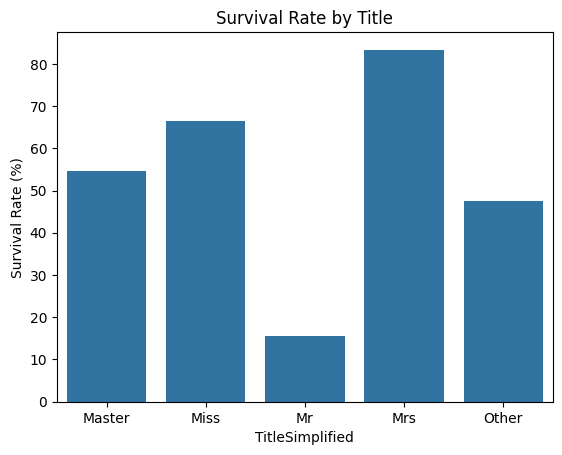

In [13]:
# Show the relevant statistics or visualization(s) to support your answer
data["Title"]=data["Name"].str.extract(r',\s*([^.]*)\.')
# List of common titles
common_titles = ['Mr', 'Mrs', 'Miss', 'Master']

# Replace rare titles with 'Other'
data['TitleSimplified'] = data['Title'].apply(lambda x: x if x in common_titles else 'Other')

# Compute survival rate
survival_by_title = data.groupby('TitleSimplified')['Survived'].mean().reset_index()
survival_by_title['Survived'] *= 100

# Plot
sns.barplot(data=survival_by_title, x='TitleSimplified', y='Survived')
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Title")
plt.show()